# CIFAR-10 Photo Classification - Case Study - Tensorflow 2.0.0


The CIFAR-10 small photo classification problem is a standard dataset used in computer vision and deep learning.


The dataset is comprised of 60,000 32×32 pixel color photographs of objects from 10 classes, such as frogs, birds, cats, ships, etc. The class labels and their standard associated integer values are listed below.

*	0: airplane
*	1: automobile
*	2: bird
*	3: cat
*	4: deer
*	5: dog
*	6: frog
*	7: horse
*	8: ship
*	9: truck

These are very small images, much smaller than a typical photograph.

## Installing dependencies and notebook gpu setup

In [1]:
!pip install tensorflow-gpu

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\sathi\AppData\Local\Temp\pip-install-r3b5w0j6\tensorflow-gpu_a7d4a64e43fa467aaef2d6765fb52d7f\setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
ERROR: Could not buil

## Importing the libraries

In [3]:
import os, sys, random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

In [5]:
print(tf.version.VERSION)
print('GPU is', 'available' if tf.config.experimental.list_physical_devices('GPU') else 'NOT AVAILABLE')

2.16.1
GPU is NOT AVAILABLE


In [1]:
seed = 321

random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

%matplotlib inline


plt.figure(figsize = (14, 11))
plt.style.use('seaborn')

colors = mcolors.TABLEAU_COLORS
sns.set(rc={'figure.figsize': (14, 11), 'figure.facecolor': 'whitesmoke', 'axes.facecolor': 'whitesmoke', 'grid.color': 'slategrey'})
sns.color_palette(list(colors.values()));

NameError: name 'random' is not defined

In [6]:
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

seed = 321

random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

plt.figure(figsize=(14, 11))
sns.set_style('darkgrid')  # Set the Seaborn style to 'darkgrid'

colors = mcolors.TABLEAU_COLORS
sns.set(rc={'figure.figsize': (14, 11), 'figure.facecolor': 'whitesmoke', 'axes.facecolor': 'whitesmoke', 'grid.color': 'slategrey'})
sns.color_palette(list(colors.values()))

# Your plotting code here


[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

<Figure size 1400x1100 with 0 Axes>

## Loading the Cifar10 dataset

In [7]:
cifar10_dataset = tf.keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10_dataset.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 366s 2us/step


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [22]:
# Setting class names in the dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [19]:
# Setting class names in the dataset
class_names = [ 'deer', 'dog', 'bike',  'ship']

## Inspecting train data

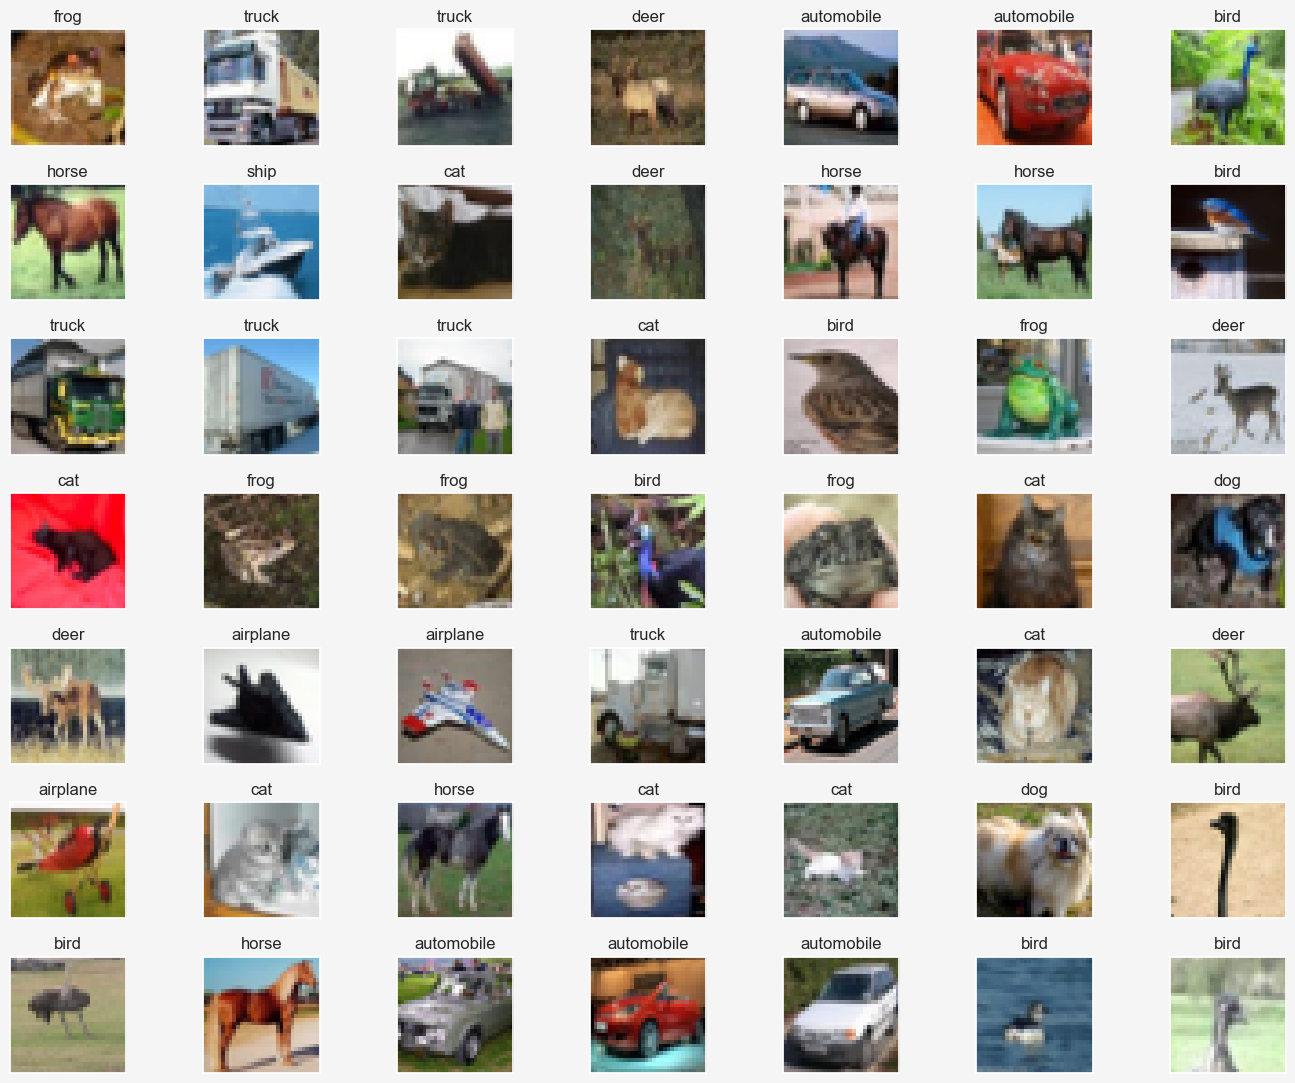

In [23]:
for i in range(49):
    plt.subplot(7, 7, i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

## Inspecting test data

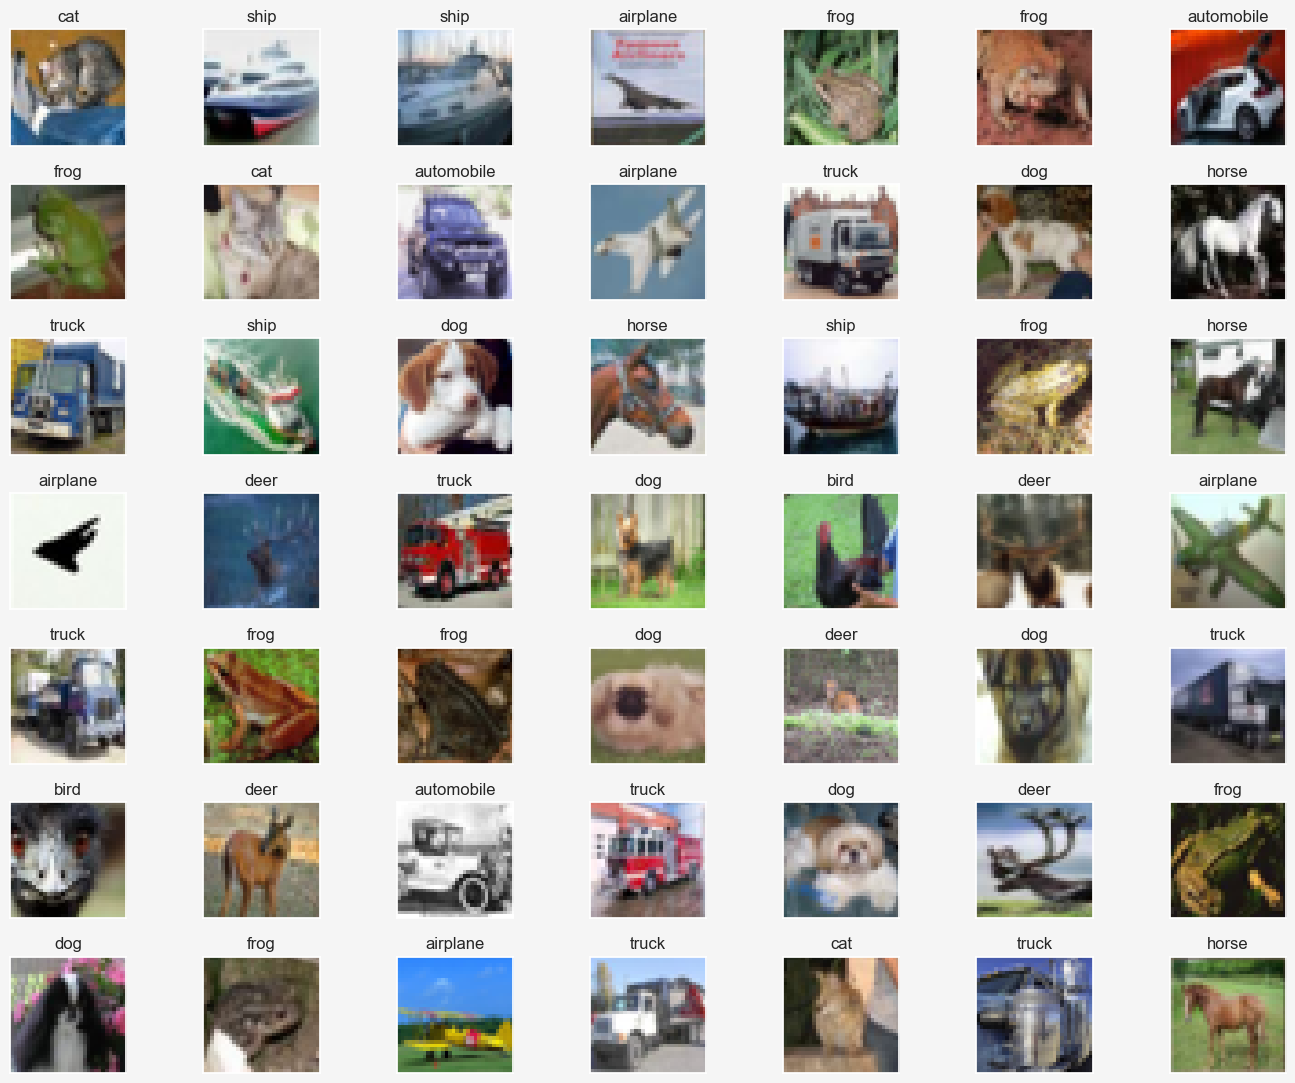

In [24]:
for i in range(49):
    plt.subplot(7, 7, i+1)
    plt.imshow(X_test[i])
    plt.title(class_names[y_test[i][0]])
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

## Data Preprocessing

### Image normalization

In [11]:
X_train = X_train.astype(np.float32)
X_train = X_train / 255.0

X_test = X_test.astype(np.float32)
X_test = X_test / 255.0

## Building a Convolutional Neural Network

### Defining the model

In [12]:
input_shape = (32, 32, 3)
filters = 64
kernel_size = (3, 3)
pool_size = (2, 2)
strides = 2
hidden_layer_size = 512
output_size = 10

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=kernel_size, padding='same', activation=tf.nn.relu, input_shape=input_shape))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=kernel_size, padding='same', activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPool2D(pool_size=pool_size, strides=strides, padding='valid'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=kernel_size, padding='same', activation=tf.nn.relu))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=kernel_size, padding='same', activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPool2D(pool_size=pool_size, strides=strides, padding='valid'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=kernel_size, padding='same', activation=tf.nn.relu))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=kernel_size, padding='same', activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPool2D(pool_size=pool_size, strides=strides, padding='valid'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(hidden_layer_size, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(hidden_layer_size, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(hidden_layer_size, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(output_size, activation=tf.nn.softmax))

model.summary()

C:\Users\sathi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,866,538 (7.12 MB)

 Trainable params: 1,866,538 (7.12 MB)

 Non-trainable params: 0 (0.00 B)

### Compiling the model

In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

### Training the model

In [25]:
epochs = 50
history = model.fit(X_train, y_train, epochs=epochs, validation_split=0.2, verbose=2)

#early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience=3)
#history = model.fit(X_train, y_train, epochs=epochs, validation_split=0.2, callbacks=[early_stopping_callback], verbose=2)

Epoch 1/50
1250/1250 - 65s - 52ms/step - loss: 1.0096 - sparse_categorical_accuracy: 0.6419 - val_loss: 0.9338 - val_sparse_categorical_accuracy: 0.6735
Epoch 2/50
1250/1250 - 56s - 45ms/step - loss: 0.9640 - sparse_categorical_accuracy: 0.6626 - val_loss: 0.9014 - val_sparse_categorical_accuracy: 0.6845
Epoch 3/50
1250/1250 - 61s - 49ms/step - loss: 0.9233 - sparse_categorical_accuracy: 0.6741 - val_loss: 0.8539 - val_sparse_categorical_accuracy: 0.6976
Epoch 4/50
1250/1250 - 61s - 48ms/step - loss: 0.8861 - sparse_categorical_accuracy: 0.6909 - val_loss: 0.9265 - val_sparse_categorical_accuracy: 0.6794
Epoch 5/50
1250/1250 - 64s - 51ms/step - loss: 0.8537 - sparse_categorical_accuracy: 0.7030 - val_loss: 0.8329 - val_sparse_categorical_accuracy: 0.7068
Epoch 6/50
1250/1250 - 60s - 48ms/step - loss: 0.8185 - sparse_categorical_accuracy: 0.7132 - val_loss: 0.7954 - val_sparse_categorical_accuracy: 0.7212
Epoch 7/50
1250/1250 - 64s - 52ms/step - loss: 0.7976 - sparse_categorical_accurac

### Plotting the model performance

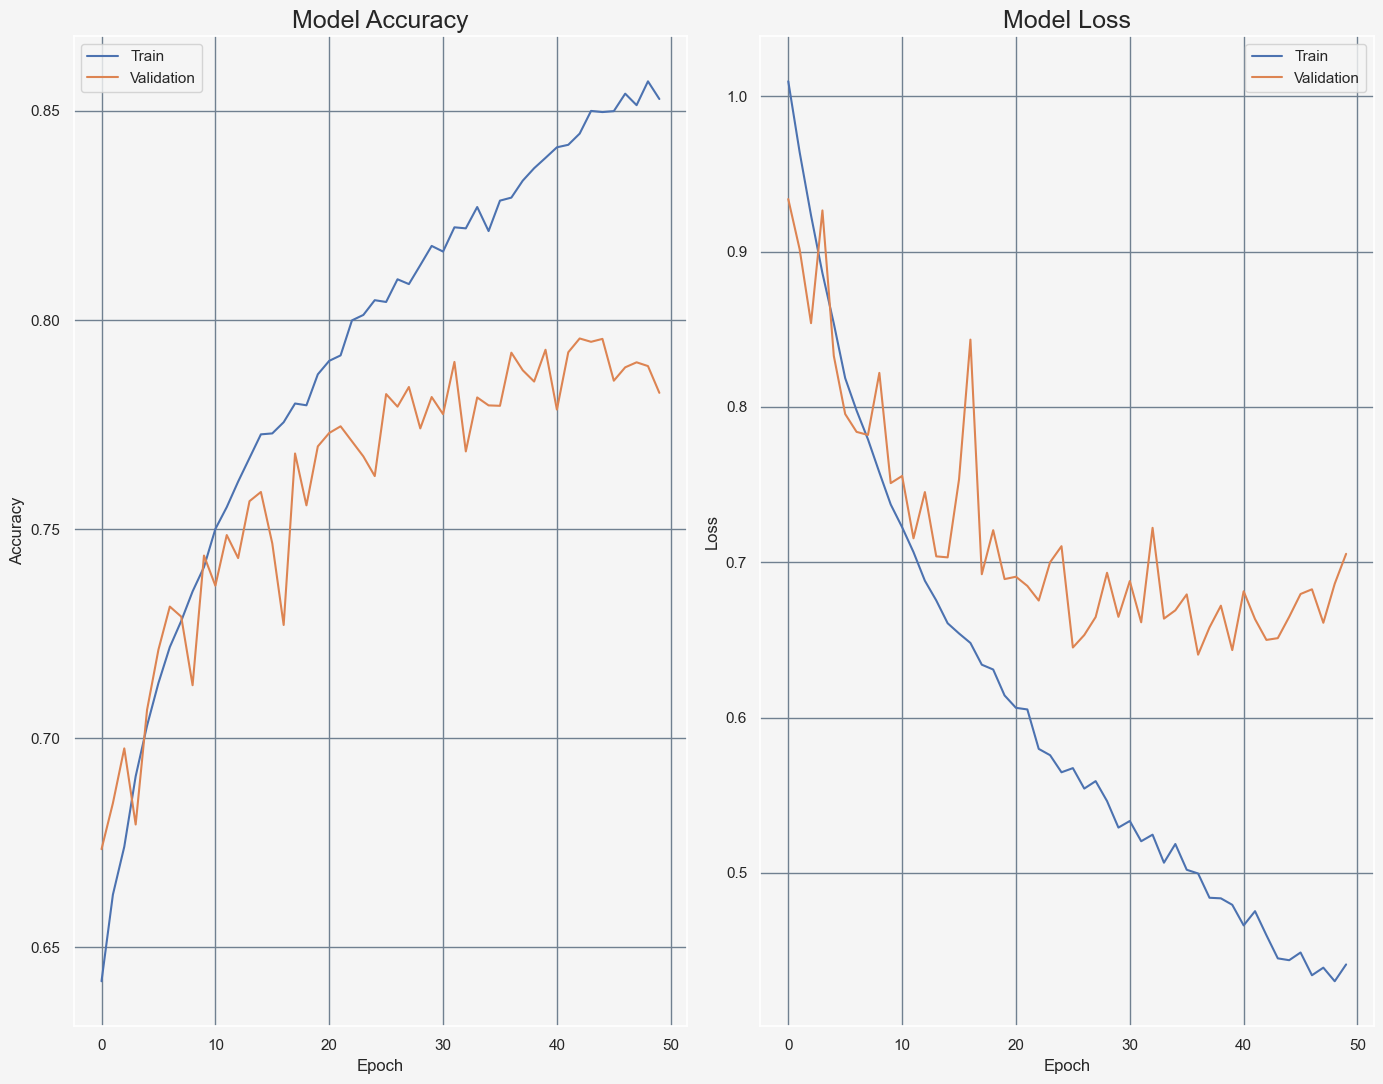

In [26]:
plt.subplot(1,2,1)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy', fontsize=18)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', fontsize=18)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()

### Evaluating the model

In [27]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose = 2)

print('\nTest loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy * 100.0))

313/313 - 5s - 16ms/step - loss: 0.7255 - sparse_categorical_accuracy: 0.7818

Test loss: 0.73. Test accuracy: 78.18%
